<a href="https://colab.research.google.com/github/n9hquan/QR103/blob/main/WS_2.4_Effects_of_factors_linear_regression_Nguyen_Chinh_Quan_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
There has been a consensus that sex, age and education have an impact on income and wealth. Specifically, individuals earn higher income and accumulate more wealth when they are more experienced (older) and more educated. Also, men are supposed to earn higher income and hold more wealth than women. In this notebook we will look into the effect of these variables on income and wealth. In particular, we do the following tasks

*      Understand the distributions of age and education in addition to those of income and wealth
*     Run linear regression of income and wealth on sex, age and education
*     Interpret the effect of sex, age and education on income and wealth

We first import the usual packages as follows.



In [5]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

# Import data

As in the previous worksheets, we use the `read_excel` function from the `pandas` package to import Excel files. When you open the data file in Excel, you will see that sex, age, education, income and wealth are denoted by `HHSEX`, `AGE`, `EDUC`, `INCOME`, and `NETWORTH`, respectively.

In [2]:
uploaded = files.upload()
dataReg = pd.read_excel(io.BytesIO(uploaded["datareg.xlsx"]))

# for those who use Safari: upload the file to the working drive and use the following code line
#dataReg = pd.read_excel('/content/datareg.xlsx')


Saving datareg.xlsx to datareg.xlsx


**Exercise:** As usual, please print the data to make sure that the data file was successfully imported.

In [4]:
# Solution goes here
dataReg

,HHSEX,AGE,EDUC,INCOME,NETWORTH
0,1,54,11,20290.628707,-400.0
1,1,54,11,20290.628707,-400.0
2,1,54,11,20290.628707,-400.0
3,1,54,11,20290.628707,-400.0
4,1,54,11,20290.628707,-400.0
...,...,...,...,...,...
30070,1,76,13,38552.194543,-110400.0
30071,1,76,13,36523.131673,-101700.0
30072,1,76,13,35508.600237,-120600.0
30073,1,76,13,43624.851720,-130300.0


The value of income and wealth is quite large. Thus, it would be more convenient for later analysis if we changed the unit of income and wealth to $100,000. We now create new variables `sex`, `age`, `edu`, `income`, and `wealth` to store the data.

In [6]:
sex = dataReg.HHSEX
age = dataReg.AGE
edu = dataReg.EDUC
income = dataReg.INCOME/100000 # unit of income now is $100,000
wealth = dataReg.NETWORTH/100000 # unit of wealth is $100,000

**Exercise:** Create boxplots of age, education, income and wealth. You may plot 4 different figures or 4 subplots in a figure (optional). Are these distributions skewed to the left or right?

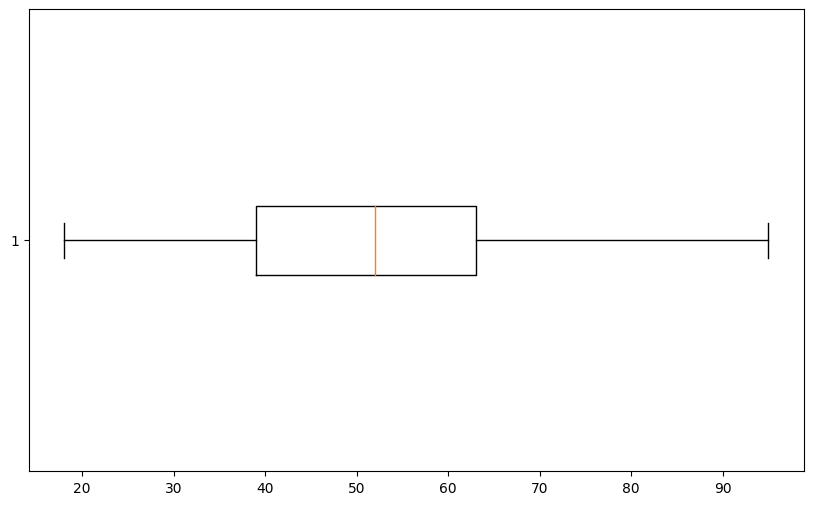

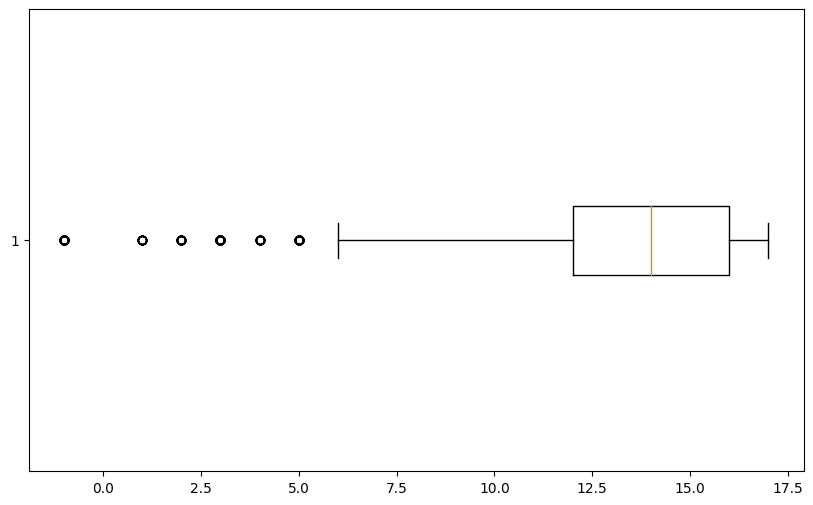

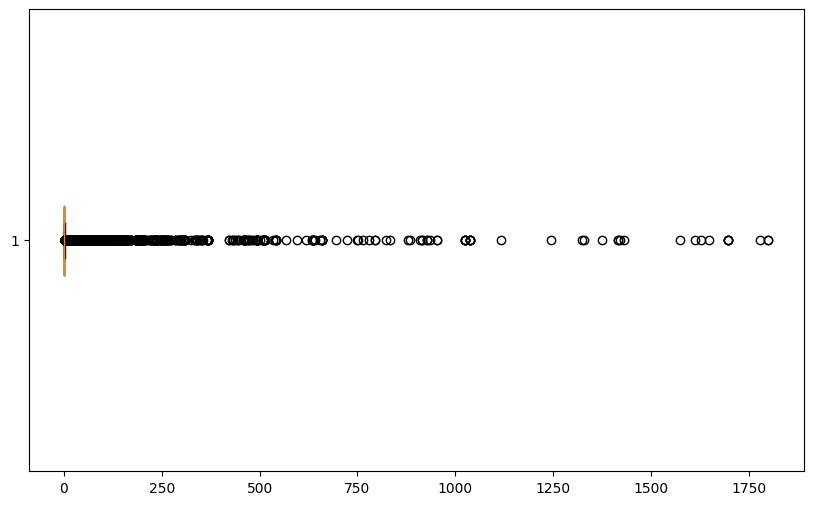

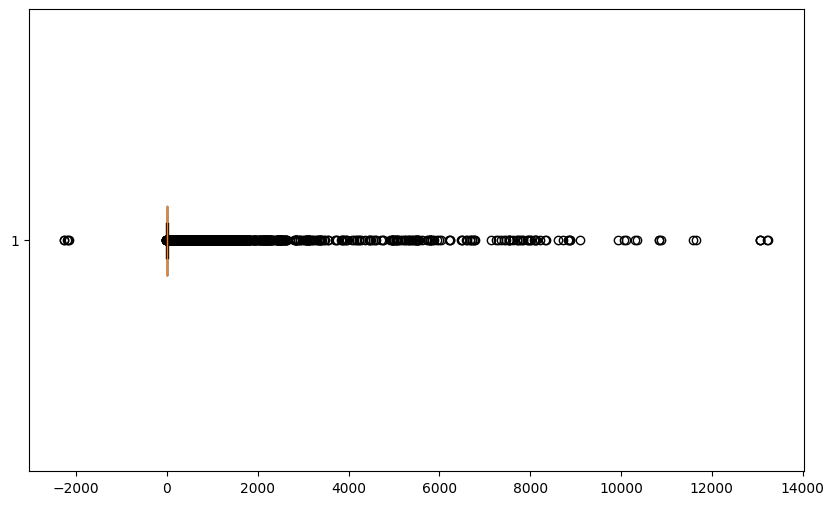

In [9]:
# Solution goes here
plt.figure(figsize=(10,6))
plt.boxplot(age, vert = False)
plt.show()
plt.figure(figsize=(10,6))
plt.boxplot(edu, vert = False)
plt.show()
plt.figure(figsize=(10,6))
plt.boxplot(income, vert = False)
plt.show()
plt.figure(figsize=(10,6))
plt.boxplot(wealth, vert = False)
plt.show()

For our later analysis, it would be more convenient to express income and wealth in logarithmic scale. This can be easily done using the `log` function, which refers to the natural log. However, the `log` function does not accept non-positive values. One solution is to give everyone a certain amount of income and wealth so that their income and wealth become positive. The following code line increases everyone's income by $100,000 and computes the logarithm of the new income level.

In [10]:
logincome = np.log(income+1) # note that 1 here is equivalent to $100,000 since we changed the unit of income
logincome

0        0.184741
1        0.184741
2        0.184741
3        0.184741
4        0.184741
           ...   
30070    0.326077
30071    0.311324
30072    0.303865
30073    0.362035
30074    0.347806
Name: INCOME, Length: 30075, dtype: float64

**Exercise:** Compute the mean wealth.

In [12]:
# Solution goes here
meanwealth = wealth.mean()
meanwealth

89.58095185677806

**Exercise:** Increase everyone's wealth by 100 times of the value of the mean, and compute the logarithm of the new values. Name the logarithm `logwealth`.

In [23]:
# Solution goes here
logwealth = np.log(wealth+meanwealth*100)

**Exercise:** Print `logwealth` to make sure that the operation was successful.

In [24]:
# Solution goes here
logwealth

0        9.100312
1        9.100312
2        9.100312
3        9.100312
4        9.100312
           ...   
30070    9.100190
30071    9.100199
30072    9.100178
30073    9.100167
30074    9.100163
Name: NETWORTH, Length: 30075, dtype: float64

# Ordinary Least Squares (OLS) regression
We are now ready to analyze the effect of age and education on income and wealth. Suppose that the natural logs of income and wealth can be determined as

$logincome_i$ = $\alpha_0 + \alpha_1 age_i + \alpha_2 edu_i + e_i$  (**model 1**)

$logwealth_i$ = $\beta_0 + \beta_1 age_i + \beta_2 edu_i + u_i$ (**model 2**)

where $logincome_i$, $logwealth_i$, $age_i$, and $edu_i$ represent the natural logs of income and wealth, age, and years of schooling of individual $i$, respectively.  The variables $e_i$ and $u_i$, called the error term or disturbance, contains unobserved factors that affect income and wealth, respectively. We are interested in the unknown parameters $\alpha_j$ and $\beta_j$, $j=1,2,3$. In particular, $\alpha_1$ and $\alpha_2$ capture the effect of age and education on income while $\beta_1$ and $\beta_2$ reflect the impact of age and education on wealth. $\alpha_0$ and $\beta_0$ are called the intercepts. To estimate the parameters $\alpha_j$ and $\beta_j$, we just need to import the package `statsmodels.api`, which provides many useful statistical tools for estimation of linear models.


In [17]:
# Import packages
import statsmodels.api as sm

Let us now focus on model 1, which explains the effect of age and education on income. To run the regression, we need to prepare a vector of the dependent variable (the natural log of income), and a matrix of independent variables (a constant, age and education). Note that the constant is associated with the parameter $\alpha_0$ while age and education are associated with the parameters $\alpha_1$ and $\alpha_2$. We can use the `column_stack` function of the `numpy` package to combine two column vectors into a matrix. For example, the following code line creates a matrix $X$ from the column vectors $age$ and $edu$.

In [18]:
X = np.column_stack((age,edu))
X

array([[54, 11],
       [54, 11],
       [54, 11],
       ...,
       [76, 13],
       [76, 13],
       [76, 13]])

This matrix $X$ currently does not include a column of constants. To add such a column to $X$, we use the `add_constant` function of the package `statsmodels.api`.

In [19]:
X = sm.add_constant(X) # add a column of 1s to X
X

array([[ 1., 54., 11.],
       [ 1., 54., 11.],
       [ 1., 54., 11.],
       ...,
       [ 1., 76., 13.],
       [ 1., 76., 13.],
       [ 1., 76., 13.]])

We are now in the position to run an OLS regression of model 1. There is a straightforward function called `OLS(Y,X)`, where $X$ is the matrix of independent variables and $Y$ is the vector of the dependent variable. The following code lines estimate model 1

In [20]:
model1 = sm.OLS(logincome,X) # model1 = sm.RLM(logincome,X) # robust model
reg1 = model1.fit()

The `fit` function from above asks Python to save all results of the estimation to the variable `reg1`. When we would like to display the main results of the estimation, i.e. the parameters and statistics, we use the `summary` function as follows.

In [21]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 INCOME   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3669.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        06:39:59   Log-Likelihood:                -40485.
No. Observations:               30075   AIC:                         8.098e+04
Df Residuals:                   30072   BIC:                         8.100e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9545      0.033    -58.943      0.0

The parameters $\alpha_j$ can be found in the middle block of the table above. Accordingly, we find that $\alpha_0=-1.9545$, $\alpha_1=0.0128$, and $\alpha_2=0.1525$. The question now is: How do we interpret these parameters? $\alpha_0$ is in fact trivial and can be ignored. $\alpha_1$ and $\alpha_2$ are positive, implying that older and more educated individuals earn higher income. When it comes the magnitude of the effect, $\alpha_1=0.0128$ implies that when an individual is one-year older, other things equal, his/her income increases by $1.28\%$ on average. Similarly, $\alpha_2=0.1525$ implies that when an individual acquires an additional year of schooling, his/her income increases by $15.25\%$ on average, ceteris paribus. Clearly, earning a degree helps people increase their income!

**Exercise:** Estimate model 2 of wealth and print the results.

In [25]:
# Solution goes here
model2 = sm.OLS(logwealth, X)
reg2 = model2.fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:               NETWORTH   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     601.4
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          8.02e-257
Time:                        06:47:28   Log-Likelihood:                 50766.
No. Observations:               30075   AIC:                        -1.015e+05
Df Residuals:                   30072   BIC:                        -1.015e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0552      0.002   5675.253      0.0

Now we assume that the natural log of income can be determined as follows

$logincome_i$ = $\gamma_0 + \gamma_1 age_i + \gamma_2 edu_i + \gamma_3 sex_i + \epsilon_i.$  (**model 3**)

Note that $sex=1$ implies male while $sex=2$ implies female. Thus, model 3 implies that the difference in income between male and female is $|100\gamma_3|$ percent.

**Exercise:** Estimate model 3 using the OLS method. Is $\gamma_3$ positive or negative? Provide an interpretation to $\gamma_3$. Hint: You just need to create a new matrix of the independent variables before running the regression.



In [26]:
# Solution goes here
Z = np.column_stack((age,edu,sex))
Z = sm.add_constant(Z)
model3 = sm.OLS(logincome,Z) # model1 = sm.RLM(logincome,X) # robust model
reg3 = model3.fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                 INCOME   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     3293.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        06:49:39   Log-Likelihood:                -39496.
No. Observations:               30075   AIC:                         7.900e+04
Df Residuals:                   30071   BIC:                         7.903e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1393      0.037    -30.954      0.0

Congratulations! You have completed the worksheet. Now I would like to introduce to you another option to run a regression using Python. There is a widely used textbook by Jeffrey Wooldridge namely *Introductory Econometrics: A Modern Approach* and a built-in Python package associated with it. Let us install and then import the package 

In [27]:
pip install wooldridge


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 75.3 MB/s eta 0:00:00


In [28]:
import wooldridge as woo # import the Wooldridge package

Now consider the following regression equation:

$y_i$ = $\alpha_0 + \sum_{i=1}^n\alpha_i x_i + e_i$ 

The following code lines will estimate the equation and print the results

`reg = smf.ols(formula='y ~ x1 + x2 + ... +xn', data=dataset)`

`results = reg.fit()`

`print(results.summary())`

where `x`, `y`, and `dataset` should be changed when you work with different variables and data sets. To import a data set from the Wooldridge package, you can run the code line

`data_name = woo.dataWoo('data_set')`

**Exercise**: Load the data set `wage1` and estimate the following model

$ln(wage_i) = \beta_0 + \beta_1 educ_i + \beta_2 exper_i + \beta_3 exper^2_i + \beta_4 tenure_i +u_i $.
